**1. Bubble Sort:**

>Bubble Sort is a simple sorting algorithm used to sort a list/array in ascending or descending order.

>It works by repeatedly swapping adjacent elements if they are in the wrong order, like bubbles rising to the surface — hence the name Bubble Sort.


Example:
Unsorted list:

[5, 3, 8, 4, 2]
Pass 1:

Compare 5 and 3 → Swap → [3, 5, 8, 4, 2]

Compare 5 and 8 → No swap

Compare 8 and 4 → Swap → [3, 5, 4, 8, 2]

Compare 8 and 2 → Swap → [3, 5, 4, 2, 8]

Biggest number (8) has "bubbled" to the end.

Keep repeating until fully sorted.

In [17]:
def bubble_sort(arr):
    n = len(arr)
    # Outer loop for number of passes
    for i in range(n):
        print(f"\nPass {i + 1}")
        # Inner loop for pairwise comparisons
        for j in range(n - 1 - i): # Last i elements are already in place
            print(f" Comparing {arr[j]} and {arr[j + 1]}")
            # Swap logic
            if arr[j] > arr[j + 1]:
                print(f"  Swapping {arr[j]} and {arr[j + 1]}")
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
            print("  Current array:", arr)
    return arr

my_list = [0, 2, 3, 5, 4]
sorted_list = bubble_sort(my_list)

print("Sorted List:", sorted_list)


Pass 1
 Comparing 0 and 2
  Current array: [0, 2, 3, 5, 4]
 Comparing 2 and 3
  Current array: [0, 2, 3, 5, 4]
 Comparing 3 and 5
  Current array: [0, 2, 3, 5, 4]
 Comparing 5 and 4
  Swapping 5 and 4
  Current array: [0, 2, 3, 4, 5]

Pass 2
 Comparing 0 and 2
  Current array: [0, 2, 3, 4, 5]
 Comparing 2 and 3
  Current array: [0, 2, 3, 4, 5]
 Comparing 3 and 4
  Current array: [0, 2, 3, 4, 5]

Pass 3
 Comparing 0 and 2
  Current array: [0, 2, 3, 4, 5]
 Comparing 2 and 3
  Current array: [0, 2, 3, 4, 5]

Pass 4
 Comparing 0 and 2
  Current array: [0, 2, 3, 4, 5]

Pass 5
Sorted List: [0, 2, 3, 4, 5]


**2. Implementing Decision Tree**


**What is a Decision Tree?**
>A Decision Tree is a supervised machine learning algorithm used for classification and regression problems.

>It works like a flowchart:

>Each internal node is a decision based on a condition (like "Is Age > 25?")

>Each leaf node represents a final outcome or prediction (like "Yes" or "No")

It can be used for both categorical and numerical data.


**How Does a Decision Tree Work?**

>Start with the full dataset.

>Choose the best feature to split data (based on criteria like Entropy, information gain or Gini index).

>Split the dataset into subsets based on the feature values.

>Repeat the process recursively on each subset until:

>All samples in a node belong to the same class (pure),

>Or some stopping condition is met (like max depth or min samples).


Common library used: sklearn.tree.DecisionTreeClassifier

Used in real life for loan approvals, diagnoses, recommendations, etc.

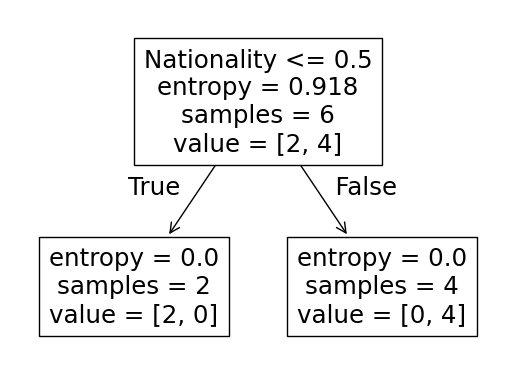

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data_1.csv")

# Convert categorical data to numeric
nationality_map = {'UK': 0, 'USA': 1, 'N': 2}
go_map = {'YES': 1, 'NO': 0}
df['Nationality'] = df['Nationality'].map(nationality_map)
df['Go'] = df['Go'].map(go_map)

# Features and target variable
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

# Train decision tree
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X, y)

# Plot the tree
plot_tree(dtree, feature_names=features)
plt.show()

# Prediction
print(dtree.predict([[45, 10, 7, 1]]))  # Predict for Age=45, Exp=10, Rank=7, Nationality=USA

**3. K-Nearest Neighbor**

Definition:
>K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification and regression tasks. It classifies new data points based on the majority class of the 'K' nearest neighbors in the training dataset.


Working of KNN:
>Choose the number K of nearest neighbors (typically odd).

>Calculate the distance (e.g., Euclidean) between the new data point and all points in the training dataset.

>Sort the distances in ascending order and select the top K closest data points.

>Count the classes of these K neighbors.

>Assign the class that is most frequent among them to the new data point.

Main Points to Remember:
>KNN is lazy learning – no training phase, just stores the dataset.

>It’s non-parametric – makes no assumptions about the data distribution.

>K should not be too small (overfitting) or too large (underfitting).

>Scaling/normalizing the data is important because KNN is distance-based.

>Commonly used in pattern recognition, recommendation systems, etc.

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import random

# Load the Iris dataset
data_iris = load_iris()
target = data_iris.target_names

# Print 10 random samples with their class names
for i in range(10):
    rn = random.randint(0, 149)
    print(data_iris.data[rn], target[data_iris.target[rn]])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    data_iris.data, data_iris.target, test_size=0.2, random_state=42
)

# Train the KNN model with 7 neighbors
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Predict a sample
sample = [[5.8, 2.7, 4.1, 1.0]]
prediction = knn.predict(sample)
print("Prediction:", target[prediction[0]])

[6.1 3.  4.6 1.4] versicolor
[4.9 2.5 4.5 1.7] virginica
[7.  3.2 4.7 1.4] versicolor
[6.1 2.6 5.6 1.4] virginica
[4.9 2.5 4.5 1.7] virginica
[4.7 3.2 1.3 0.2] setosa
[5.9 3.2 4.8 1.8] versicolor
[7.6 3.  6.6 2.1] virginica
[5.8 2.6 4.  1.2] versicolor
[5.  3.5 1.6 0.6] setosa
Prediction: versicolor


**4. Linear Regression**

Linear Regression is a supervised machine learning algorithm used for predicting a continuous value (not categories).

It models the relationship between a dependent variable (Y) and one or more independent variables (X) by fitting a straight line to the data.



The general equation of a simple linear regression model is:

                      𝑦 = 𝑚𝑥 + 𝑐

Where:

m = slope of the line (how much y changes with x)

c = intercept (value of y when x = 0)

**What is Synthetic Data?**

Synthetic data is artificially generated data used for testing and learning purposes. It follows a known mathematical relationship and may include random noise to simulate real-world imperfections.

**Applications of Linear Regression:**

Predicting housing prices

Forecasting sales/revenue

Estimating exam scores

Analyzing trends in data

[[4.22215108]
 [8.1590861 ]]


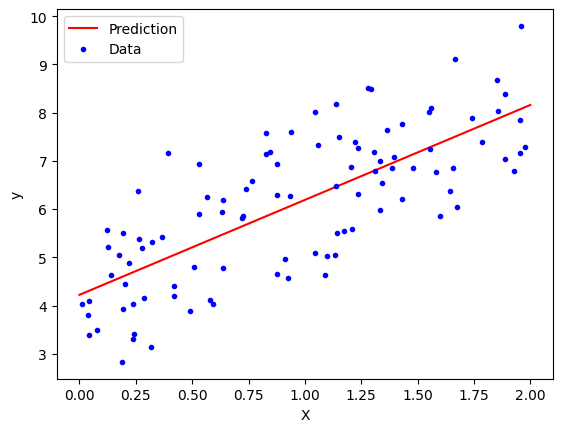

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(0) # Ensures reproducibility

X = 2 * np.random.rand(100,1) # 100 random X values between 0 and 2
y = 4 + 2 * X + np.random.randn(100,1) # y = 4 + 2x + noise

# Train model
model = LinearRegression().fit(X, y)

# Predict
x_new = np.array([[0],[2]])
predict = model.predict(x_new)
print(predict)

# Plot
plt.plot(x_new, predict, 'r-', label = "Prediction")
plt.plot(X, y, 'b.', label = "Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**5. Naive Bayes**

 is a classification algorithm based on Bayes' Theorem, and it’s called “naive” because it assumes that all features are independent — which is rarely true in real life, but it works well anyway!

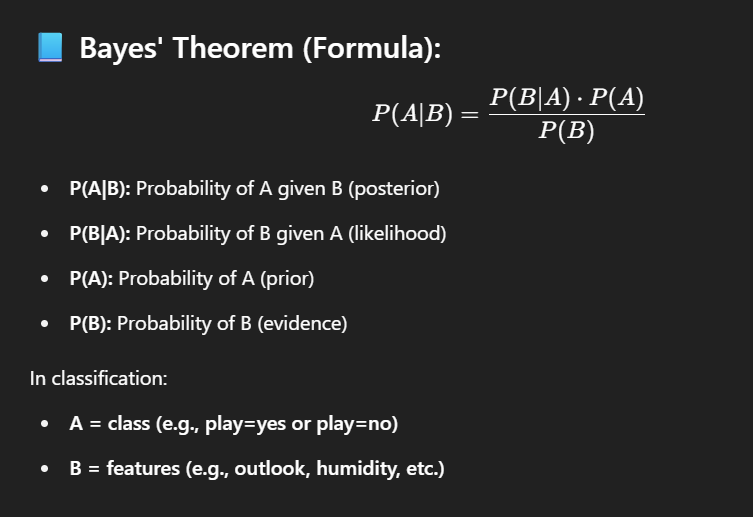

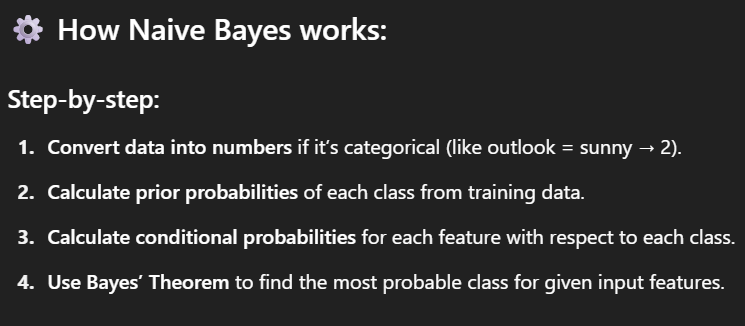

**Why use Naive Bayes?**

Very fast and simple.

Works well for small datasets.

Good with categorical data.

Often used in spam detection, sentiment analysis, medical diagnosis, etc.

In [32]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Define the dataset
data = {
    'outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 'sunny', 'sunny', 'rainy', 'sunny'],
    'temp': ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool', 'mild', 'cool', 'mild', 'mild'],
    'humidity': ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal', 'high', 'normal', 'normal', 'high'],
    'windy': ['false', 'true', 'false', 'false', 'false', 'true', 'true', 'false', 'false', 'true', 'true'],
    'play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes']
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Encode categorical features
# models can't handle text like "sunny" or "high", so you use LabelEncoder to convert them to numbers.
le = LabelEncoder()
df['outlook'] = le.fit_transform(df['outlook'])
df['temp'] = le.fit_transform(df['temp'])
df['humidity'] = le.fit_transform(df['humidity'])
df['windy'] = le.fit_transform(df['windy'])
df['play'] = le.fit_transform(df['play'])

# Step 4: Define features and label
features = ['outlook', 'temp', 'humidity', 'windy']
X = df[features]
y = df['play']

# Step 5: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Step 6: Train Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Step 7: Prediction example
print(clf.predict([[2, 1, 0, 1]]))  # sample input

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**6. K-Means Clustering(data.csv)**

>K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into clusters.

**How K-Means Works (Step-by-Step)**


1. Choose K (number of clusters):
You decide how many clusters (K) you want to create.

2. Initialize Centroids:
Randomly place K points (called centroids) on the graph.

3. Assign Data Points to Nearest Centroid:
For each data point, calculate the distance to each centroid.
Assign it to the closest one → forms a cluster.

4. Update Centroids:
After assigning, recalculate the new center (mean) of each cluster → this becomes the new centroid.

5. Repeat Steps 3 & 4:
Repeat assignment and updating until centroids don’t change much → model has converged.

>**Example**
If you had height and weight data of people, K-Means could group them into:

>Underweight

>Normal

>Overweight

... without any labels! It just uses the similarity in features.

**Example Applications of K-Means**

1. Search Engines
>Group similar search results or webpages to improve relevance.
2. Medical Diagnosis
> Group patients with similar symptoms or lab results for early diagnosis.
3. Geo-Mapping / Location Analysis
>Cluster areas based on population, crime rate, or sales.
Used in placing delivery hubs, stores, etc.


In [53]:
import pandas as pd
from sklearn.cluster import KMeans

# Load data from CSV file
df = pd.read_csv('data1.csv')

# Select features for clustering
features = ['X1', 'X2']
X = df[features]
y = ['Label']

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
kmeans.fit(X)

# Predict the cluster for a new data point
new_point = [[1.713, 1.586]]
prediction = kmeans.predict(new_point)

print("Predicted cluster:", prediction)

Predicted cluster: [1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


**7.Gradient Boosting**

Gradient Boosting is an ensemble learning technique used for classification and regression tasks, which builds a strong predictive model by combining many weak learners (typically decision trees), in a sequential manner.

**At each step, the algorithm:**

Calculates the error (residual) from the previous model,

Then fits a new model to this error using gradient descent to minimize a chosen loss function,

Finally, it adds the new model to the overall prediction.

This process continues iteratively, boosting the model’s performance by correcting its previous mistakes using the gradient (slope) of the error.

**Real-Life Applications:**

Credit scoring in banks

Predicting disease risks in healthcare

Fraud detection systems

Ranking systems in search engines (like Google)

Customer churn prediction in telecom


**Advantages:**

Works well with tabular data

Handles non-linear relationships

Gives high accuracy

Can handle mixed types of features

**Disadvantages:**

Slower to train

Prone to overfitting if not tuned properly

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification #Fake data generator for testing

# Generate synthetic dataset
X, y = make_classification(
    n_samples = 10, # 10 samples (rows)
    n_features = 5, # Each sample has 5 features (columns)
    n_informative = 2, # 2 features are actually useful in predicting the label
    n_redundant = 2, # 2 features are linear combinations of informative features
    random_state = 1 # for reproducibility
)

#Create a Gradient Boosting Classifier model
model = GradientBoostingClassifier()

# Train the model
model.fit(X,y)

# Make prediction on a new data point
predictions = model.predict([[-0.12183555,  1.52492298, -0.8690756,  -1.17851383,  1.35634283]])
print(predictions)

[0]


**8. Fuzzy C-Means Clustering**

Fuzzy C-Means (FCM) is a clustering algorithm — similar to K-Means, but with one BIG difference:

In K-Means, each data point belongs to only one cluster.

In FCM, each data point can belong to more than one cluster, with a degree of membership between 0 and 1.

These degrees for all points and all clusters are stored in a big table called the membership matrix (usually denoted as U).

**Simple Example:**

Suppose you have 3 clusters:

In K-Means, a data point will belong to just one of them (e.g., cluster 2).

In FCM, that same point could belong:

60% to cluster 1

30% to cluster 2

10% to cluster 3

This is called soft clustering (vs hard clustering like K-Means).

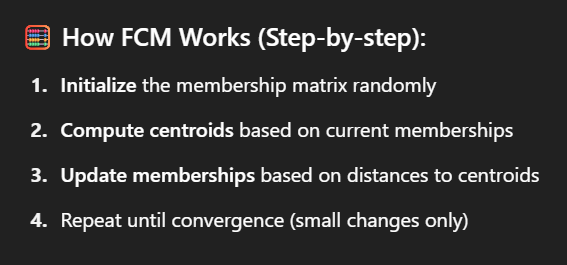

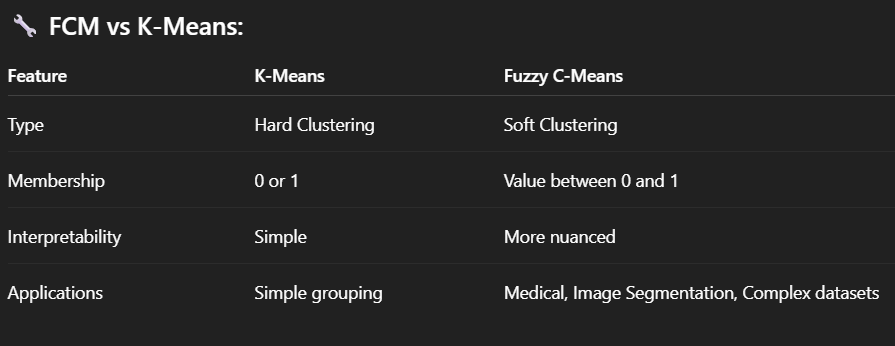

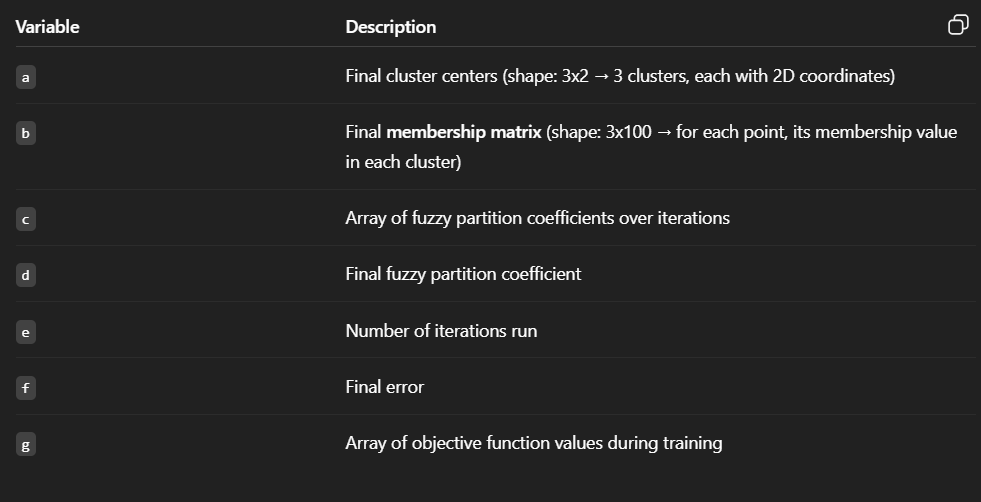

In [58]:
import numpy as np
# !pip install scikit-fuzzy
import skfuzzy as fuzz

np.random.seed(0)

data = np.random.rand(100, 2)

# Apply Fuzzy C-Means clustering
a, b, c, d, e, f, g = fuzz.cluster.cmeans(
    data.T,        # Transpose the data to shape (features, samples) → shape becomes (2, 100)
    3,             # Number of clusters to form
    2,             # Fuzziness coefficient (m=2), controls the level of cluster fuzziness
    error=0.0005,  # Stopping criterion (minimum improvement between iterations)
    maxiter=10000, # Max number of iterations
    init=None      # Let the algorithm choose initial membership values
)

# Print the cluster centers (3 clusters, each with 2 coordinates)
print("Cluster Centers:\n", a)

# Print the cluster each data point belongs to (hard classification by taking argmax of membership)
print("\nPredicted Cluster Labels:\n", np.argmax(b, axis=0))
# b[:, 0] = [0.2, 0.6, 0.2] → max is 0.6 → belongs most to cluster 1 → argmax = 1

Cluster Centers:
 [[0.22731922 0.71980171]
 [0.5183518  0.18664337]
 [0.76306795 0.6008733 ]]

Predicted Cluster Labels:
 [2 2 0 0 2 2 2 1 0 2 2 0 0 0 1 0 0 0 2 2 1 1 2 1 1 2 1 1 1 1 1 1 0 1 1 2 2
 1 1 1 1 0 1 1 2 0 0 1 1 1 1 2 0 2 0 0 1 2 2 2 2 2 0 0 1 2 1 2 2 2 2 0 2 0
 2 0 0 0 2 1 2 2 2 0 1 1 1 1 0 1 0 1 2 2 1 1 0 2 1 0]


**9. Random Forest**

Random Forest is a supervised machine learning algorithm used for both:

Classification (predict categories)

Regression (predict numbers)

It’s built using a concept called Ensemble Learning(Bagging), where many weak learners (like decision trees) are combined to make a strong model.


**Core Idea**

Instead of relying on one decision tree, Random Forest builds many decision trees, each trained on random data, and then averages the results (for regression) or takes the majority vote (for classification).

Think of it like:

“Ask 100 random people and go with the majority opinion.”

**Working**

Build many decision trees.

Train each tree on a random sample of the data.

Use a random subset of features at each split.

Each tree makes its own prediction.

Final prediction is by majority vote or average.

In [71]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Read the dataset
df = pd.read_csv('randomforest.csv')


# Convert categorical values to numeric
d = {'no': 0, 'yes': 1, 'unknown': 0}
df['default'] = df['default'].map(d)

# Select features and target
features = ['age', 'default', 'cons.price.idx', 'cons.conf.idx']
X = df[features]
y = df['y ']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make a prediction
a = model.predict([[56, 0, 93.9, 36.4]])
print(a)

# Accuracy of model
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


['yes']
Accuracy: 0.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**10.Implementing Agglomerative Clustering**

**Definition:**

Agglomerative Clustering is a bottom-up hierarchical clustering method.
You start with each data point as its own cluster, then repeatedly merge the closest pairs of clusters until you have one big cluster — or as many clusters as you want.

**Think of it like this:**

Every point starts alone.

The two closest points get glued together.

Now you have tiny clusters.

Keep gluing the closest clusters together.

Repeat until you’re done.

**Real-life applications**

Agglomerative Clustering is practical when:

You don’t know how many clusters you want upfront.

You care about the hierarchy — the “nested” structure.

Where it’s used:

>Document or text grouping: Organize similar news articles or research papers.

>Biology: Build phylogenetic trees — grouping species by genetic similarity.

>Social networks: Find communities based on connection patterns.

>Market segmentation: Cluster customers based on buying behavior.

>Image segmentation: Group pixels that are similar in color/texture.

>Anomaly detection: Find outliers by spotting points that don’t merge easily.

[0 1 0 0 1 0 1 0 1 1]


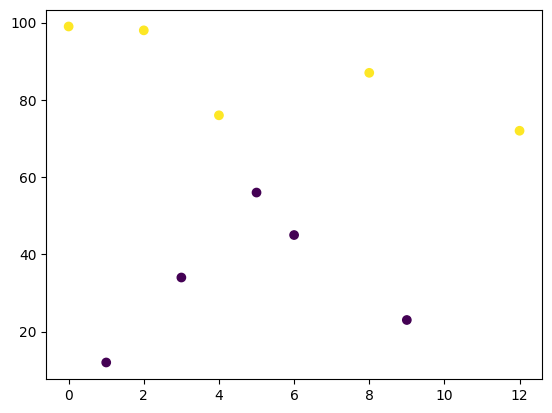

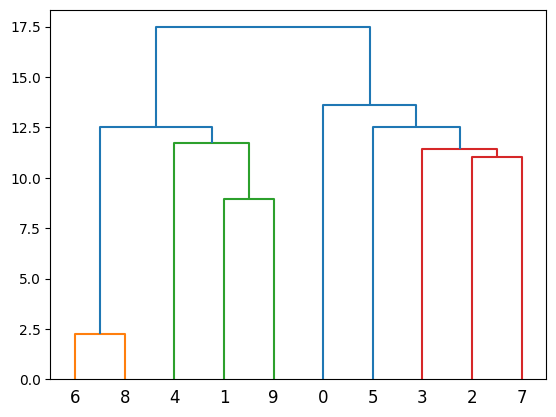

In [76]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = [1, 4, 6, 3, 8, 9, 2, 5, 0, 12]
y = [12, 76, 45, 34, 87, 23, 98, 56, 99, 72]
data = list(zip(X, y))
a = AgglomerativeClustering().fit_predict(data)
print(a)

plt.scatter(X, y, c = a)
plt.show()

b = linkage(data)
dendrogram(b)
plt.show()

**11. Sequential Neural Network with Iris Dataset using Keras**

A Sequential Neural Network is the most basic form of a neural network architecture, where layers are stacked one after another in order — no loops, no branching, no jumping around.



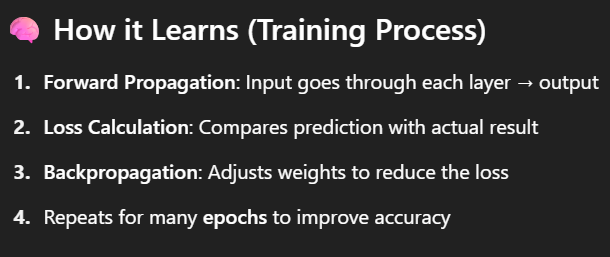

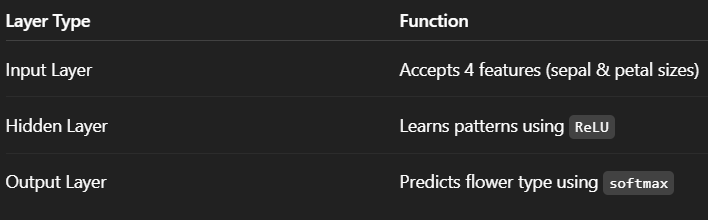

In [81]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
data_iris = load_iris()
X = data_iris.data
y = data_iris.target

# Standardize the features
X = StandardScaler().fit_transform(X)

# (LabelEncoder is not needed here since y is already in 0, 1, 2 format)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=8,
          validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", accuracy)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3023 - loss: 1.1375 - val_accuracy: 0.3333 - val_loss: 1.0816
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3234 - loss: 1.0725 - val_accuracy: 0.3667 - val_loss: 1.0202
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4279 - loss: 0.9899 - val_accuracy: 0.4667 - val_loss: 0.9669
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4632 - loss: 0.9431 - val_accuracy: 0.5667 - val_loss: 0.9155
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4852 - loss: 0.8925 - val_accuracy: 0.5667 - val_loss: 0.8700
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5548 - loss: 0.8169 - val_accuracy: 0.6333 - val_loss: 0.8262
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6546 - loss: 0.8395 - val_accuracy: 0.6667 - val_loss: 0.7863
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7034 - loss: 0.7834 - val_accuracy: 0.7667 - val_loss: 0.7501


**12. Implementing SVM Classifier**

SVM is a supervised machine learning algorithm used for classification (and sometimes regression).
Its main goal is to find the best boundary (called a hyperplane) that separates data points of different classes.

**How Does It Work?**

Imagine you have two types of flowers: red and blue. SVM will try to:

Find the best straight line (in 2D) or hyperplane (in higher dimensions) that separates the red from the blue flowers.

**This line is chosen so that:**

It maximizes the margin between the two classes (i.e., it's as far as possible from the nearest points of both classes).

The nearest points to the line are called support vectors — these are the most important points for the SVM!

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.svm import SVC

# Load the Iris dataset
data_iris = load_iris()
target_names = data_iris.target_names
X = data_iris.data
y = data_iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = SVC()
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Accuracy
print("Predictions:", predictions)
print("Accuracy:", metrics.accuracy_score(y_test, predictions))

# Print the class name of the first prediction
print("First prediction class name:", target_names[predictions[0]])

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0
First prediction class name: versicolor
